In [1]:
import random
import os
import pandas as pd 
import numpy as np
from tensorflow.keras.preprocessing.image import * 
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
import random
import matplotlib
import matplotlib.font_manager as fm
# fm.get_fontconfig_fonts()
# font_location = 'C:/notebook_dir/NanumGothic.ttf'
# font_name = fm.FontProperties(fname=font_location).get_name()
# matplotlib.rc('font', family=font_name)

# 1. 데이터 불러오기 

## 1-1. 데이터 경로 저장

In [2]:
# 학습 데이터 준비 
path = "C:/notebook_dir/public/landmark_image"  # 하나의 이미지 폴더에 '도' 구분 없이 각 폴더 이동 
img_dirs = os.listdir(path) # 해당 path안에 폴더 이름 리스트에 담기

label_df = pd.read_csv('./public/category.csv') # 각 랜드마크별 label
label_dict = dict(label_df[['landmark_name', 'landmark_id']].values)
label_dict_reverse = dict(label_df.values)

In [3]:
# 파일(JPG)명과 label 정보를 담은 데이터 프레임 생성
files = []
categories=[]
for img_dir in img_dirs:
    img_dir_list = os.listdir(path + '/' + img_dir)
    for filename in img_dir_list:
        file = filename
        files.append(img_dir + '/' + file)
        categories.append(label_dict[img_dir])
    
train_data=pd.DataFrame(
                    {"file":files,
                    "label":categories}
                )    

train_data[300:500]

,file,label
300,APEC나루공원/APEC나루공원_084.JPG,985
301,APEC나루공원/APEC나루공원_085.JPG,985
302,APEC나루공원/APEC나루공원_087.JPG,985
303,APEC나루공원/APEC나루공원_089.JPG,985
304,APEC나루공원/APEC나루공원_090.JPG,985
...,...,...
495,G 챔피언스 파크/G_챔피언스_파크_018.JPG,644
496,G 챔피언스 파크/G_챔피언스_파크_019.JPG,644
497,G 챔피언스 파크/G_챔피언스_파크_021.JPG,644
498,G 챔피언스 파크/G_챔피언스_파크_022.JPG,644


## 1-2 Train Test Split 

In [7]:
train_df, valid_df = train_test_split(train_data, test_size=0.2, random_state= 42,
                                     stratify=train_data['label'])

In [18]:
display(pd.DataFrame(train_df['label'].value_counts()/len(train_df)).sort_index().head(20))
display(pd.DataFrame(valid_df['label'].value_counts()/len(valid_df)).sort_index().head(20))

,label
0,0.000936
1,0.000993
2,0.000823
3,0.000936
4,0.000951
5,0.001022
6,0.000908
7,0.000894
8,0.000837
9,0.000922


,label
0,0.000908
1,0.001022
2,0.000851
3,0.000908
4,0.000965
5,0.001022
6,0.000908
7,0.000908
8,0.000851
9,0.000908


## 1-3. Image Generate 생성 

In [48]:
# 데이터 형상 관련 상수 정의 
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNEL=3
batch_size=32

In [49]:
train_datagen=ImageDataGenerator(rescale=1./255) # MinMaxScaling
train_generator=train_datagen.flow_from_dataframe(
    train_data,
    path,
    x_col= "file",
    y_col= "label",
    target_size = IMAGE_SIZE,
    class_mode = "raw",
    batch_size = batch_size )

Found 88102 validated image filenames.


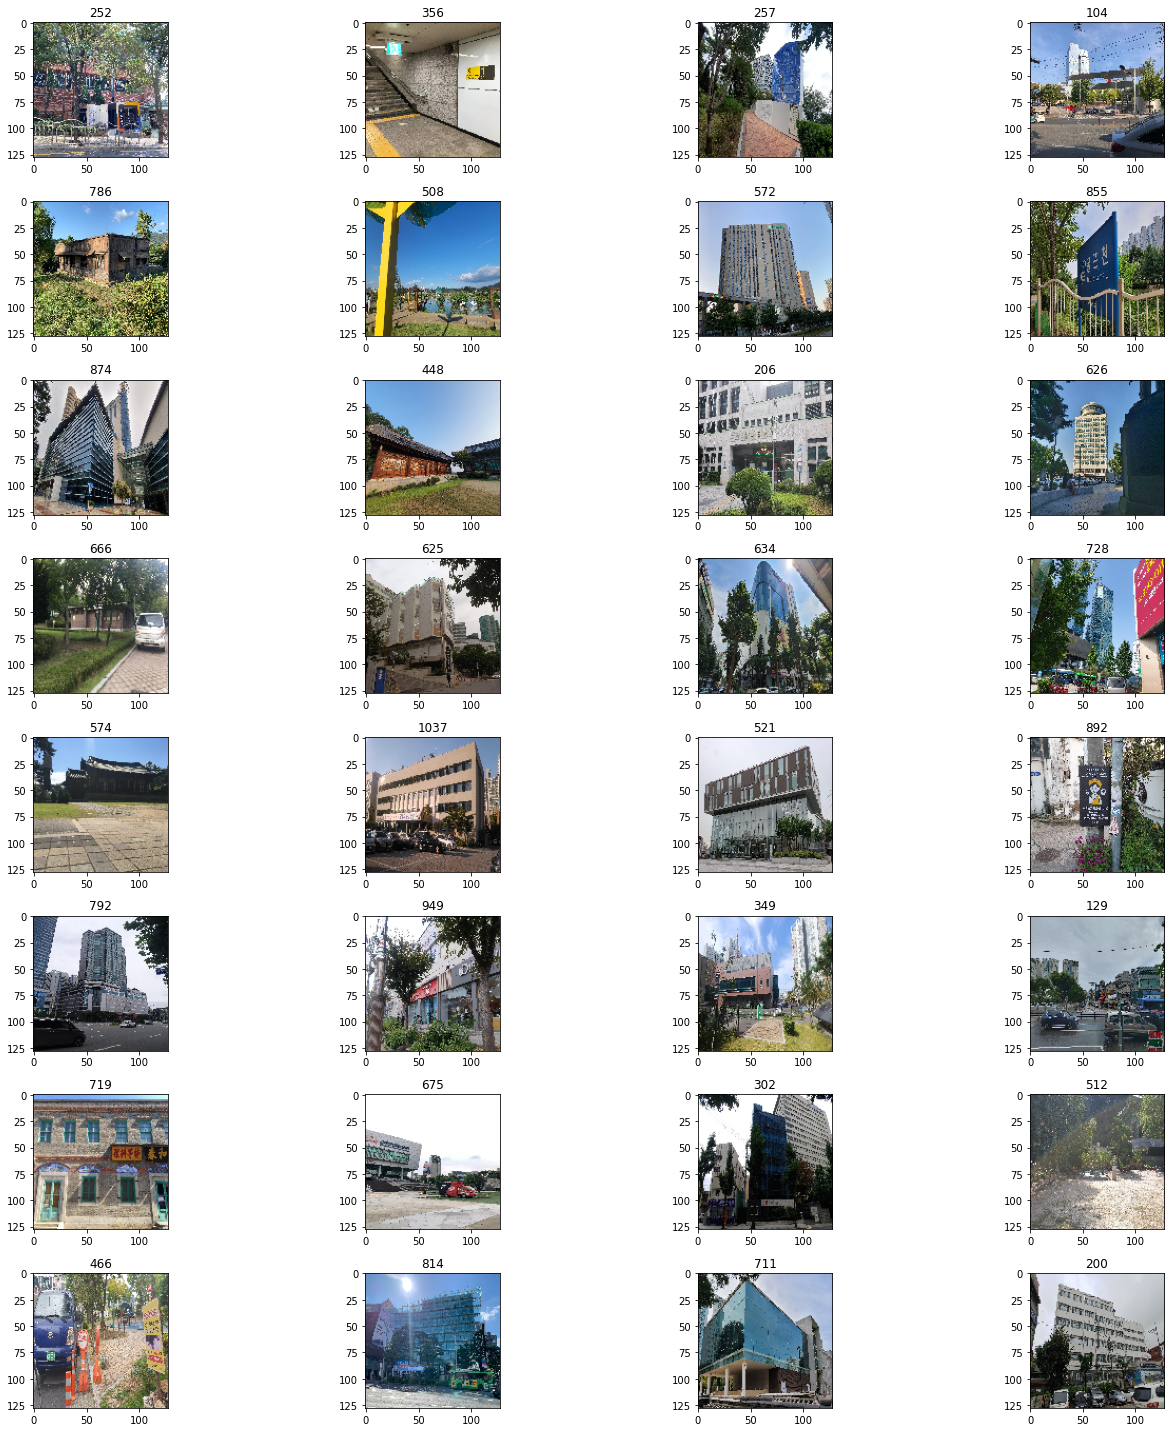

In [52]:
# 시각화 해보기
plt.figure(figsize=(20,20))
for i in range(0,32):
    plt.subplot(8,4,i+1)
    for xBatch, yBatch in train_generator:
        image = xBatch[0]
        plt.title(yBatch[0])
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [21]:
image_df = pd.DataFrame()
image_df['image'] = xBatch
image_df['label'] = yBatch

Exception: Data must be 1-dimensional

array([0.8078432 , 0.83921576, 0.882353  , ..., 0.20784315, 0.20000002,
       0.20392159], dtype=float32)

In [34]:
pd.DataFrame(yBatch).sort_values(0).value_counts()

875    101
350    101
528     97
478     97
176     97
      ... 
32      70
112     70
841     69
552     67
427     66
Length: 1049, dtype: int64

In [44]:
np.save('landmark_array.npy', xBatch) # numpy.ndarray 저장. @파일명, @값
np.save('label_array.npy', yBatch)


In [42]:
xBatch.size * xBatch.itemsize

4330389504

In [43]:
xBatch

array([[[[0.6156863 , 0.5803922 , 0.56078434],
         [0.5882353 , 0.5686275 , 0.54509807],
         [0.64705884, 0.61960787, 0.5803922 ],
         ...,
         [0.83921576, 0.8470589 , 0.8941177 ],
         [0.8352942 , 0.8431373 , 0.89019614],
         [0.7960785 , 0.80392164, 0.85098046]],

        [[0.61960787, 0.5921569 , 0.5686275 ],
         [0.58431375, 0.57254905, 0.54509807],
         [0.6392157 , 0.6039216 , 0.5686275 ],
         ...,
         [0.83921576, 0.8470589 , 0.8941177 ],
         [0.82745105, 0.8352942 , 0.882353  ],
         [0.7960785 , 0.80392164, 0.85098046]],

        [[0.6       , 0.5803922 , 0.5568628 ],
         [0.6313726 , 0.6117647 , 0.5882353 ],
         [0.64705884, 0.6156863 , 0.57254905],
         ...,
         [0.83921576, 0.8470589 , 0.8941177 ],
         [0.8235295 , 0.8313726 , 0.87843144],
         [0.7960785 , 0.8078432 , 0.8431373 ]],

        ...,

        [[0.69411767, 0.68235296, 0.6627451 ],
         [0.72156864, 0.7058824 , 0.69411767]

In [56]:
path = "C:/notebook_dir/test"  # 하나의 이미지 폴더에 '도' 구분 없이 각 폴더 이동 
img_dirs = os.listdir(path) 

files = []
test_id=[]
for img_dir in img_dirs:
    img_dir_list = os.listdir(path + '/' + img_dir)
    for filename in img_dir_list:
        file = filename
        files.append(img_dir + '/' + file)
        test_id.append(file.split('.JPG')[0])
    
test_data=pd.DataFrame(
                    {"file":files,
                    "label":test_id}
                )    

In [65]:
test_data['file']

0        0/000b85kx5d.JPG
1        0/002msp5aqm.JPG
2        0/003pjobcd8.JPG
3        0/006r4lemjl.JPG
4        0/007kjoke4f.JPG
               ...       
37960    z/zzvbeamn4d.JPG
37961    z/zzwqkytjyj.JPG
37962    z/zzxg4eqox1.JPG
37963    z/zzxtgfn0xp.JPG
37964    z/zzz3w4hsr6.JPG
Name: file, Length: 37965, dtype: object

In [63]:
IMAGE_WIDTH=64
IMAGE_HEIGHT=64
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNEL=3
batch_size=len(test_data)

test_datagen=ImageDataGenerator(rescale=1./255) # MinMaxScaling
test_generator=train_datagen.flow_from_dataframe(
    test_data,
    path,
    x_col= "file",
    y_col= "label",
    target_size = IMAGE_SIZE,
    class_mode = "raw",
    batch_size = batch_size )

Found 37964 validated image filenames.


In [59]:
for xBatch, yBatch in test_generator:
    image = xBatch
    label = yBatch
    break

In [60]:
np.save('test_array.npy', xBatch) # numpy.ndarray 저장. @파일명, @값
np.save('id_array.npy', yBatch)

In [61]:
image.shape

(37964, 64, 64, 3)

In [68]:
yBatch.shape

(37964,)

In [75]:
test_id = pd.DataFrame(columns=['id'])
test_id['id'] = yBatch

In [84]:
test_id.to_csv('test_id.csv')

In [81]:
a = list(yBatch)
b = list(test_data['label'])

In [83]:
for i in b:
    if i not in a:
        print(i)

.ipynb_checkpoints


In [80]:
len(a)

31652

In [79]:
b

['000b85kx5d',
 '002msp5aqm',
 '003pjobcd8',
 '006r4lemjl',
 '007kjoke4f',
 '0095f6yxlp',
 '00d0cs63ij',
 '00dzlxoxek',
 '00e5v02waq',
 '00ev2f0mk7',
 '00ez51vcp0',
 '00gf2lfy8b',
 '00gf7hvn5x',
 '00i98oi0ds',
 '00ibtcvsv9',
 '00j9bqg5fn',
 '00lhl7yd94',
 '00n329adje',
 '00ocntddqp',
 '00p39s507n',
 '00qu43ip9i',
 '00vb1cu3cp',
 '00xar4kha6',
 '00yhgypuhf',
 '00zrqw17ia',
 '00zxdrqetr',
 '00zzlxgwq2',
 '010u3p31by',
 '011b3jqhzv',
 '011oaszenj',
 '0126770i6j',
 '014o5sptyx',
 '014y8y5vbt',
 '016p30kzc4',
 '017g9qwyjc',
 '017nsya60t',
 '017ynivyf9',
 '019vtpz7og',
 '01bt8swlnk',
 '01dzp2ggzj',
 '01e4zgkhir',
 '01ejfn81pg',
 '01ejz0grwu',
 '01eyripiwr',
 '01gihw9cbm',
 '01i96hilyk',
 '01nog1c29c',
 '01rflotf4m',
 '01ttct5ypk',
 '01uezd7br0',
 '01ujvmxlzh',
 '01ummc8z80',
 '01x1qtvmqk',
 '01xgc3uiax',
 '01ygagglrr',
 '01zjv5vkg0',
 '021j47gfr7',
 '021xecl039',
 '023cc7gz9d',
 '023jxcd6jx',
 '023wveiy9y',
 '02574x3009',
 '025kiiok39',
 '027p3n9lrx',
 '027vbiuwww',
 '028vykrn8y',
 '02d2tth1